In [1]:
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

In [3]:
#df = df.iloc[:1000]

In [4]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

In [5]:
#sns.pairplot(df)

In [6]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

Arrival_delay            1.000000
Upstream_stop_delay      0.993935
Dwell_time               0.218745
Recurrent_delay          0.162692
Scheduled_travel_time    0.100695
Name: Arrival_delay, dtype: float64

In [7]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

model = GradientBoostingRegressor()
model.fit(x,y)

cross_val_score(model, x, y, cv=5).mean()

0.9920079268965173

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.773497326147545
Mean Squared Error: 213.4826060960061
R-squared: 0.9928409489657458


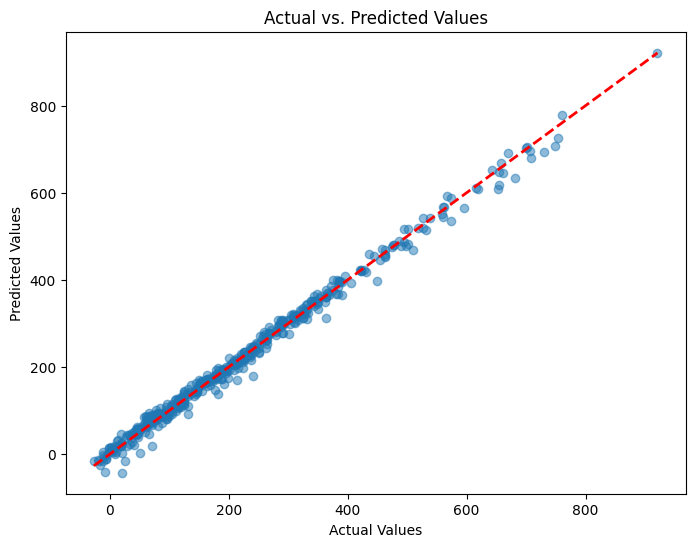

In [11]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()